In [27]:
import geopandas as gpd

# Load your presence data (assume it's in a CSV file with 'longitude' and 'latitude' columns)
presence_data = gpd.read_file('../../data/26-05-2024-1505/presence_absence.json')
presence_data = presence_data[presence_data['target'] == 1]

In [40]:
import pandas as pd
from sdm_bio.utils import geoframe_to_pandas, pandas_to_geoframe, plot_points
from shapely.geometry import Point
import geopandas as gpd

df = pd.read_parquet("C:/Users/kenji/dev/sdm_bio_vinaceous-breasted-amazon/data/30-05-2024/occurence.parquet")

def thin_points(points, min_distance):
    thinned_points = []
    for point in points:
        if all(point.distance(other_point) >= min_distance for other_point in thinned_points):
            thinned_points.append(point)
    return thinned_points

def thin_occurences(presence_data: gpd.GeoDataFrame,  min_distance = 1000, target_default_value = 1):
    wgs84 = "EPSG:4326"
    utm = "EPSG:32633"  # UTM zone 33N as an example
    
    presence_data = presence_data.to_crs(utm)
    
    if isinstance(presence_data.geometry.iloc[0], tuple):
        presence_data['geometry'] = presence_data.apply(lambda row: Point(row.geometry), axis=1)
        
    points = list(presence_data.geometry)

    # Define minimum distance (in the same units as the projected CRS)
   

    # Apply the thinning algorithm
    thinned_points = thin_points(points, min_distance)

    # Convert thinned points back to a GeoDataFrame
    thinned_data = gpd.GeoDataFrame(geometry=thinned_points, crs=utm)
    # Reproject thinned points back to WGS84
    thinned_data = thinned_data.to_crs(wgs84)
    thinned_data['target'] = target_default_value
    return geoframe_to_pandas(thinned_data)

df_geo = pandas_to_geoframe(df)
thinned_data_pd = thin_occurences(presence_data=df_geo,min_distance= 1000)

(<Figure size 1000x1200 with 1 Axes>,
 <Axes: title={'center': 'Points on Map'}, xlabel='Longitude', ylabel='Latitude'>)

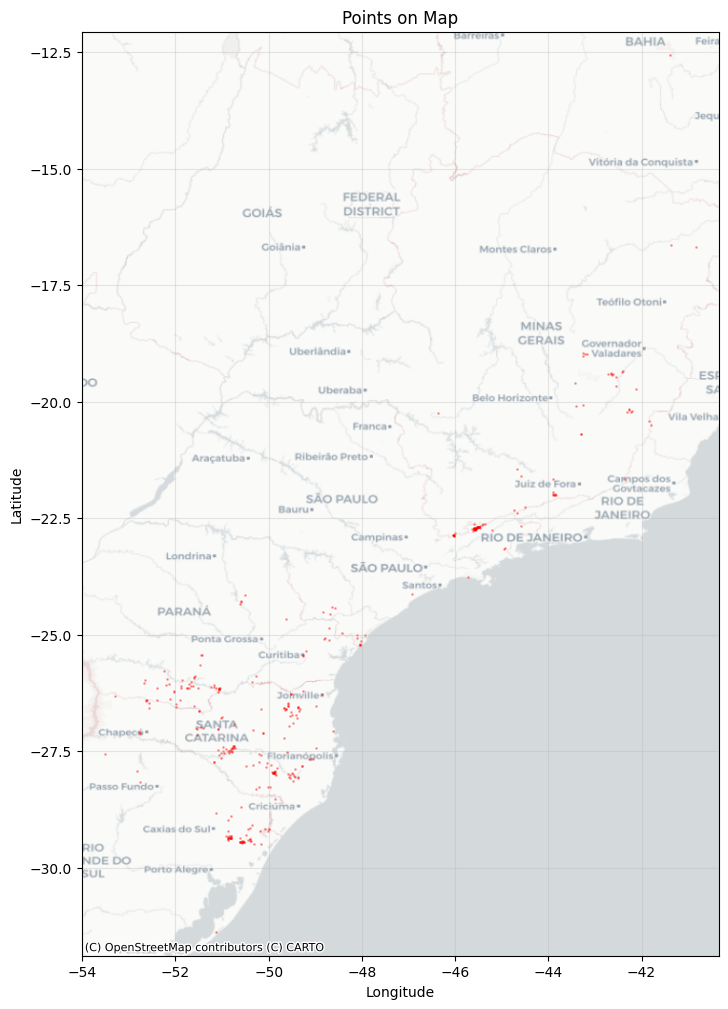

In [43]:
plot_points(thinned_data_pd)

In [20]:
thinned_data_pd

,lat,lon,target
0,-0.000266,10.510803,1


In [11]:
thinned_data_pd

,lat,lon,target
0,-0.000266,10.510803,1


In [31]:

from shapely.geometry import Point
from sdm_bio.utils import geoframe_to_pandas, pandas_to_geoframe

def thin_points(points, min_distance):
    thinned_points = []
    for point in points:
        if all(point.distance(other_point) >= min_distance for other_point in thinned_points):
            thinned_points.append(point)
    return thinned_points

def thin_occurences(presence_data: gpd.GeoDataFrame,  min_distance = 1000, target_default_value =1):
    wgs84 = "EPSG:4326"
    utm = "EPSG:32633"  # UTM zone 33N as an example
    
    if isinstance(presence_data.geometry.iloc[0], tuple):
        presence_data['geometry'] = presence_data.apply(lambda row: Point(row.geometry), axis=1)
        
    points = list(presence_data.geometry)

    # Define minimum distance (in the same units as the projected CRS)
   

    # Apply the thinning algorithm
    thinned_points = thin_points(points, min_distance)

    # Convert thinned points back to a GeoDataFrame
    thinned_data = gpd.GeoDataFrame(geometry=thinned_points, crs=utm)
    # Reproject thinned points back to WGS84
    thinned_data = thinned_data.to_crs(wgs84)
    thinned_data['target'] = target_default_value
    return geoframe_to_pandas(thinned_data)

In [32]:
thinned_data_pd = thin_occurences(presence_data=presence_data)

In [33]:
thinned_data_pd

,lat,lon,target
0,-0.000202,10.510856,1
